# Etude sur Alien vs. Predator - épisode 1

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

L'avenir de l'espère humaine est donc entre les mains de la Promo 2 de Rennes de l'école Microsoft IA by Simplon qui doit développer un programme de vision par ordinateur capable de distinguer un Alien d'un Prédator et ainsi choisir la bonne application à utiliser pour se débarrasser de l'extraterrestre.

Pour cela, utiliser la démarche suivante :

    1. Télécharger le dataset adéquat sur le répertoire Teams de la promotion ;
    2. Implémenter et entrainer un CNN en utilisant la librairie Keras. Son architecture est la suivante :
    
        ayers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3))
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu')
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')
        layers.MaxPooling2D(pool_size=(2, 2))
        layers.Flatten()
        layers.Dense(units=512, activation='relu')
        layers.Dense(units=1, activation='sigmoid')
        
    3.L'entrainer en mode full batch sur 100 epoch ;
    4.Conclure.



### 1 - import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des images

In [3]:
dataset_dir = 'Data/'

TRAINING_DIR = dataset_dir + 'Train/'
VALIDATION_DIR = dataset_dir + 'Validation/'
TEST_DIR = dataset_dir + 'Test/'

In [4]:
datagen = ImageDataGenerator()

In [5]:
generator_test = datagen.flow_from_directory(TEST_DIR,
                                            target_size = (150, 150),
                                            batch_size = 200,
                                            class_mode="binary"
                                            )

Found 200 images belonging to 2 classes.


In [6]:
#y_test=X_test.classes
X_test = generator_test[0][0]
y_test = generator_test[0][1]

In [7]:
y_test.shape

(200,)

In [8]:
model = load_model('model')

In [9]:
y_test_pred = model.predict(X_test)

In [10]:
# y_test_pred

In [11]:
y_test_pred  = y_test_pred > 0.5

In [12]:
# y_test_pred

In [13]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[54, 46],
       [35, 65]], dtype=int64)

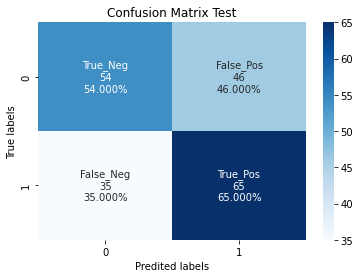

In [14]:
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

In [15]:
from sklearn.metrics import classification_report

In [16]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.61      0.54      0.57       100
  Predator 1       0.59      0.65      0.62       100

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200



In [17]:
accuracy_score_keras = tensorflow.keras.metrics.BinaryAccuracy()
accuracy_score_keras.update_state(y_test, y_test_pred)
print(accuracy_score_keras.result().numpy())

0.595


Courbe ROC, AUC

In [18]:
AUC_keras = tensorflow.keras.metrics.AUC()
AUC_keras.update_state(y_test, y_test_pred)
AUC_keras.result().numpy()

0.59499997

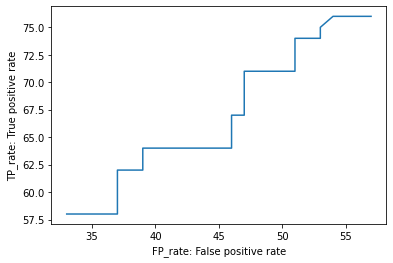

In [19]:
#COURBE ROC

FP_rate = []
TP_rate = []

for seuil in AUC_keras.thresholds[1:-1] :
    FP_rate_seuil = tensorflow.keras.metrics.FalsePositives(thresholds=seuil)
    FP_rate_seuil.update_state(y_test, model.predict(X_test).flatten())
    
    FP_rate.append(FP_rate_seuil.result().numpy())
    
    
    TP_rate_seuil = tensorflow.keras.metrics.TruePositives(thresholds=seuil)
    TP_rate_seuil.update_state(y_test, model.predict(X_test).flatten())
    
    TP_rate.append(TP_rate_seuil.result().numpy())

    
    
#print(TP_rate)
#print(FP_rate)
    
fig = plt.figure()
plt.plot(FP_rate, TP_rate)
plt.xlabel('FP_rate: False positive rate')
plt.ylabel('TP_rate: True positive rate')
plt.show()   

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.595


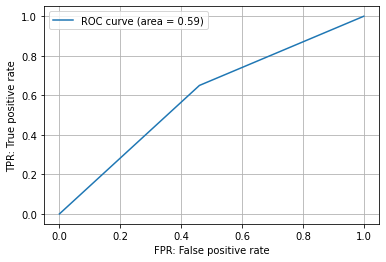

In [24]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

### observation : 
    le resultat de ce modèle n'est pas bon car il n'y a pas assez d'images -  données, donc nous allons étudier d'augumenter des nombres d'image pour la suite dans l'episode 2.

#### test avec model_cv2

In [25]:
model_cv2 = load_model('model_cv2')

In [26]:
y_test_pred_cv2 = model.predict(X_test)
y_test_pred_cv2  = y_test_pred_cv2 > 0.5

In [27]:
cm_test_cv2 = confusion_matrix(y_test, y_test_pred_cv2)
cm_test_cv2

array([[54, 46],
       [35, 65]], dtype=int64)

In [28]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_test, y_test_pred_cv2, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.61      0.54      0.57       100
  Predator 1       0.59      0.65      0.62       100

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200



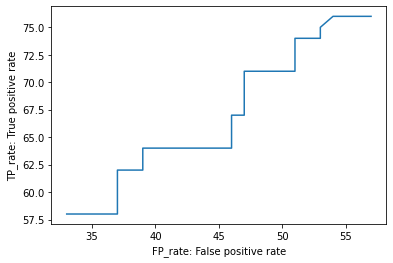

In [29]:
#COURBE ROC

FP_rate = []
TP_rate = []

for seuil in AUC_keras.thresholds[1:-1] :
    FP_rate_seuil = tensorflow.keras.metrics.FalsePositives(thresholds=seuil)
    FP_rate_seuil.update_state(y_test, model_cv2.predict(X_test).flatten())
    
    FP_rate.append(FP_rate_seuil.result().numpy())
    
    
    TP_rate_seuil = tensorflow.keras.metrics.TruePositives(thresholds=seuil)
    TP_rate_seuil.update_state(y_test, model_cv2.predict(X_test).flatten())
    
    TP_rate.append(TP_rate_seuil.result().numpy())

    
    
#print(TP_rate)
#print(FP_rate)
    
fig = plt.figure()
plt.plot(FP_rate, TP_rate)
plt.xlabel('FP_rate: False positive rate')
plt.ylabel('TP_rate: True positive rate')
plt.show()   

#オリジナルの画像からデータセットを作成する方法 

https://intellectual-curiosity.tokyo/2019/07/02/%E3%82%AA%E3%83%AA%E3%82%B8%E3%83%8A%E3%83%AB%E3%81%AE%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%E6%96%B9/

https://child-programmer.com/ai/cnn-originaldataset-samplecode-description/

https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17

matplotlibのcmap(colormap)パラメータ
https://beiznotes.org/matplot-cmap-list/